In [ ]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session

import matplotlib.pyplot as plt

import pickle

In [ ]:
# databank file is generated by motion_of_a_particle.py
infile = open("databank",'rb')
new = pickle.load(infile)
infile.close()
#print(new[0])
print(new.shape)
R_e = 6.4e6 # Earth radius

x_data = np.array([])
y_data = np.array([])
for i in range(new.shape[0]-1):
  x_data = np.hstack((x_data, new[i]))
  y_data = np.hstack((y_data, new[i+1]))
  # -1 is used as the data is put into pairs so the total nuber of data points in each var is 1 less than the total
x_data = x_data.reshape(new.shape[0]-1, 3)
y_data = y_data.reshape(new.shape[0]-1, 3)

new = new/R_e

(14947, 3)


In [ ]:
clear_session()

model = Sequential()
#model.add(Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(Dense(units = 110, activation = 'selu', input_shape=[3], use_bias=True))
model.add(Dense(units = 110, activation = 'selu', use_bias=True))
model.add(Dense(units = 110, activation = 'selu', use_bias=True))
model.add(Dense(units = 3, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 110)               440       
_________________________________________________________________
dense_1 (Dense)              (None, 110)               12210     
_________________________________________________________________
dense_2 (Dense)              (None, 110)               12210     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 333       
Total params: 25,193
Trainable params: 25,193
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit( x_data, y_data, epochs=1000, verbose=0)

In [ ]:
p_data = model.predict(x_data)
p_data = p_data/R_e
p_data = p_data.T
print(new.shape, p_data.shape)

(3, 14947) (3, 14946)


In [ ]:
x = np.array([x_data[0]])
p_data = np.array([[]])
for i in range(new.shape[0]):
  x = model.predict([x])
  p_data = np.hstack((p_data, x))
p_data = p_data.reshape((new.shape[0], 3))
p_data = p_data/R_e
p_data = p_data.T
print(new.shape, p_data.shape)

(6453, 3) (3, 6453)


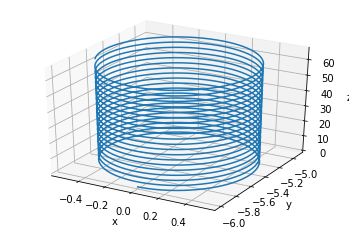

In [ ]:
#plots original data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

new = new.T

#ax.plot(new[0][0:700], new[1][0:700], new[2][0:700])
ax.plot(new[0], new[1], new[2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.savefig('dipole_analyt_plot.png')
plt.show()

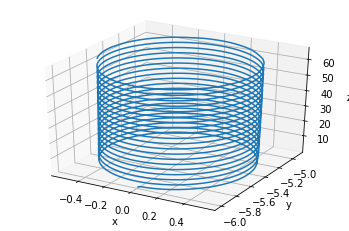

In [ ]:
#plots predicted data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(p_data[0], p_data[1], p_data[2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.savefig('dipole_analyt_plot.png')
plt.show()

In [ ]:
#new = new.T
print(new[89])

[ 0.36343558 -5.85644858  0.4001317 ]


In [ ]:
y = model.predict(x_data[88:89])
#p_data = p_data.T
#y = p_data[2]
print("y = ", y/R_e)

y =  [[ 0.3600982 -5.8490524  0.3937088]]
